In [62]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import gridspec

import matplotlib.font_manager as fm
fm.fontManager.addfont("D2Coding.ttc")

plt.rcParams["font.family"] = "D2Coding"
plt.rcParams["text.usetex"] = False
plt.rcParams["mathtext.fontset"] = "stix"

# Linear Data Fitting Report

For given $N$ data observation-points $\set{(x_i,\,y_i,\,x_i',\, y_i', )}_{i=1}^{i=N}\quad(i\in 1\dots N)$, and a linear mapping model: $$\begin{align*}
x' &= a_1x + a_2y + a_3\\
y' &= a_4x + a_5y + a_6
\end{align*}$$

find the "best" (in the least-squares sense) set of parameters $\mathbf{a} = (a_1, \cdots, a_6)$ that fits the given data.

## Least Squares Method

We can rewrite the linear mapping model in a matrix form:

$$\begin{bmatrix}
x' & y'
\end{bmatrix} =
\begin{bmatrix}
x & y & 1
\end{bmatrix}
\begin{bmatrix}
a_1 & a_4 \\
a_2 & a_5 \\
a_3 & a_6 
\end{bmatrix}=\mathbf{X}' = \mathbf{X}\mathbf{A}$$

Assuming we have $n$ data, then $x,\, y,\, x',\, y'$ are considered as $(n, 1)$ shaped column vectors.

We want to get the best estimation of $\mathbf{A}$ that minimizes the error between the observed data $\mathbf{X}'$ and the predicted data $\hat{\mathbf{X}}' = \mathbf{X}\mathbf{A}$.

The error can be defined as the SSE (Sum of Squared Errors): $$E = ||{\mathbf{X}' - \hat{\mathbf{X}}'}||^2 = ||{\mathbf{X}' - \mathbf{X}\mathbf{A}}||^2$$

To minimize the error, we can take the derivative of $E$ with respect to $\mathbf{A}$ and set it to zero: $$\frac{\partial E}{\partial \mathbf{A}} = -2\mathbf{X}^T(\mathbf{X}' - \mathbf{X}\mathbf{A}) = 0$$

And so we get the normal equation: $$\mathbf{X}^T\mathbf{X}\mathbf{A} = \mathbf{X}^T\mathbf{X}'$$

If $\mathbf{X}^T\mathbf{X}$ is invertible, we can solve for $\mathbf{A}$ as follows: $$\mathbf{A} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}'$$

In [63]:
fitdata1 = np.loadtxt("./fitdata/fitdata1.dat")
fitdata2 = np.loadtxt("./fitdata/fitdata2.dat")
fitdata3 = np.loadtxt("./fitdata/fitdata3.dat")

In [ ]:
def lstsq_np(data: np.ndarray) -> np.ndarray:
    x = data[:, 0]
    y = data[:, 1]
    x_p = data[:, 2]
    y_p = data[:, 3]

    n = fitdata1.shape[0]

    X = np.column_stack((x, y, np.ones(n)))

    X_p = np.column_stack((x_p, y_p),)

    params, _, _, _ = np.linalg.lstsq(X, X_p, rcond=None)

    return params

def lstsq_without_np(data: np.ndarray) -> np.ndarray:
    x = data[:, 0]
    y = data[:, 1]
    x_p = data[:, 2]
    y_p = data[:, 3]

    n = fitdata1.shape[0]

    X = np.column_stack((x, y, np.ones(n)))

    X_p = np.column_stack((x_p, y_p),)

    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    XTX_p = X.T @ X_p

    params = XTX_inv @ XTX_p

    return params

#params_fitdata1 = lstsq_np(fitdata1)
#params_fitdata1_no_np = lstsq_without_np(fitdata1)

In [65]:
params_fitdata1 = lstsq_without_np(fitdata1)
params_fitdata2 = lstsq_without_np(fitdata2)
params_fitdata3 = lstsq_without_np(fitdata3)

## Result

Plotting the fitdatas and the fitting equations.

In [72]:
def plot_fitdata(data: np.ndarray, params: np.ndarray, target_name: str) -> None:
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle(f"Least Squares Fitting Visualize for {target_name}", fontsize=28)

    
    gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[1.0, 0.9])

    x_range = np.linspace(data[:, 0].min(), data[:, 0].max(), 25)
    y_range = np.linspace(data[:, 1].min(), data[:, 1].max(), 25)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)

    X_prime_fit = params[0, 0] * X_grid + params[1, 0] * Y_grid + params[2, 0]
    Y_prime_fit = params[0, 1] * X_grid + params[1, 1] * Y_grid + params[2, 1]

    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', s=45, alpha=0.7)
    ax1.plot_surface(X_grid, Y_grid, X_prime_fit, alpha=0.35, cmap='Blues')
    ax1.set_xlabel('x'); ax1.set_ylabel('y'); ax1.set_zlabel("x'")
    ax1.set_title("$x' = a_1x + a_2y + a_3$", fontsize=22)

    ax2 = fig.add_subplot(gs[0, 1], projection='3d')
    ax2.scatter(data[:, 0], data[:, 1], data[:, 3], c='red', s=45, alpha=0.7)
    ax2.plot_surface(X_grid, Y_grid, Y_prime_fit, alpha=0.35, cmap='Reds')
    ax2.set_xlabel('x'); ax2.set_ylabel('y'); ax2.set_zlabel("y'")
    ax2.set_title("$y' = a_4x + a_5y + a_6$", fontsize=22)


    ax3 = fig.add_subplot(gs[1, :])
    ax3.axis('off')
    a1, a2, a3 = params[:, 0]
    a4, a5, a6 = params[:, 1]

    pred_xp = a1 * data[:, 0] + a2 * data[:, 1] + a3
    pred_yp = a4 * data[:, 0] + a5 * data[:, 1] + a6
    rms_xp = np.sqrt(np.mean((data[:, 2] - pred_xp) ** 2))
    rms_yp = np.sqrt(np.mean((data[:, 3] - pred_yp) ** 2))

    # Left side: Parameters
    param_text_left = (
        r"$\mathbf{Estimated\ Parameters:}$" + "\n\n"
        r"$a_1 = " + f"{a1:.6g}" + r"$" + "\n"
        r"$a_2 = " + f"{a2:.6g}" + r"$" + "\n"
        r"$a_3 = " + f"{a3:.6g}" + r"$" + "\n"
        r"$a_4 = " + f"{a4:.6g}" + r"$" + "\n"
        r"$a_5 = " + f"{a5:.6g}" + r"$" + "\n"
        r"$a_6 = " + f"{a6:.6g}" + r"$"
    )
    
    # Right side: Equations and Errors
    param_text_right = (
        r"$\mathbf{Mapping\ Equations:}$" + "\n\n"
        r"$x' = " + f"{a1:.6g}" + r"\cdot x + " + f"{a2:.6g}" + r"\cdot y + " + f"{a3:.6g}" + r"$" + "\n"
        r"$y' = " + f"{a4:.6g}" + r"\cdot x + " + f"{a5:.6g}" + r"\cdot y + " + f"{a6:.6g}" + r"$" + "\n\n"
        r"$\mathbf{RMS(Root\ Mean\ Square)\ Errors:}$" + "\n\n"
        r"$\mathrm{RMS}(x') = " + f"{rms_xp:.6g}" + r"$" + "\n"
        r"$\mathrm{RMS}(y') = " + f"{rms_yp:.6g}" + r"$"
    )
    
    ax3.text(0.05, 0.95, param_text_left, va='top', ha='left', fontsize=18)
    ax3.text(0.5, 0.95, param_text_right, va='top', ha='left', fontsize=18)

    plt.tight_layout()
# ...existing code...

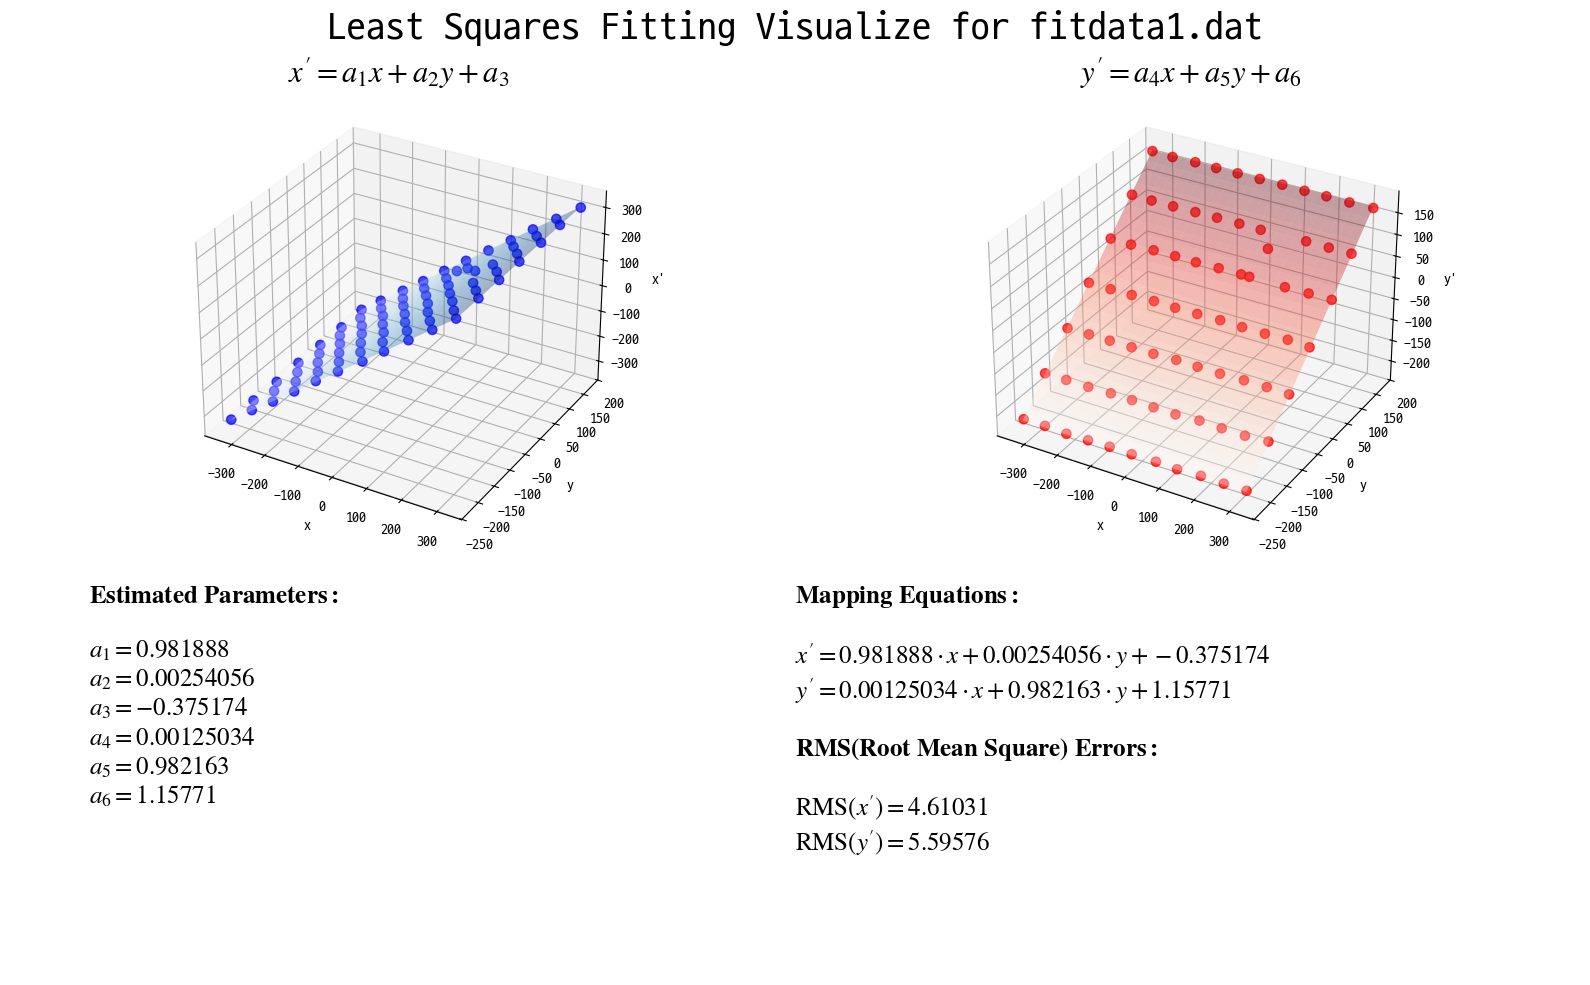

In [73]:
plot_fitdata(fitdata1, params_fitdata1, "fitdata1.dat")
plt.show()

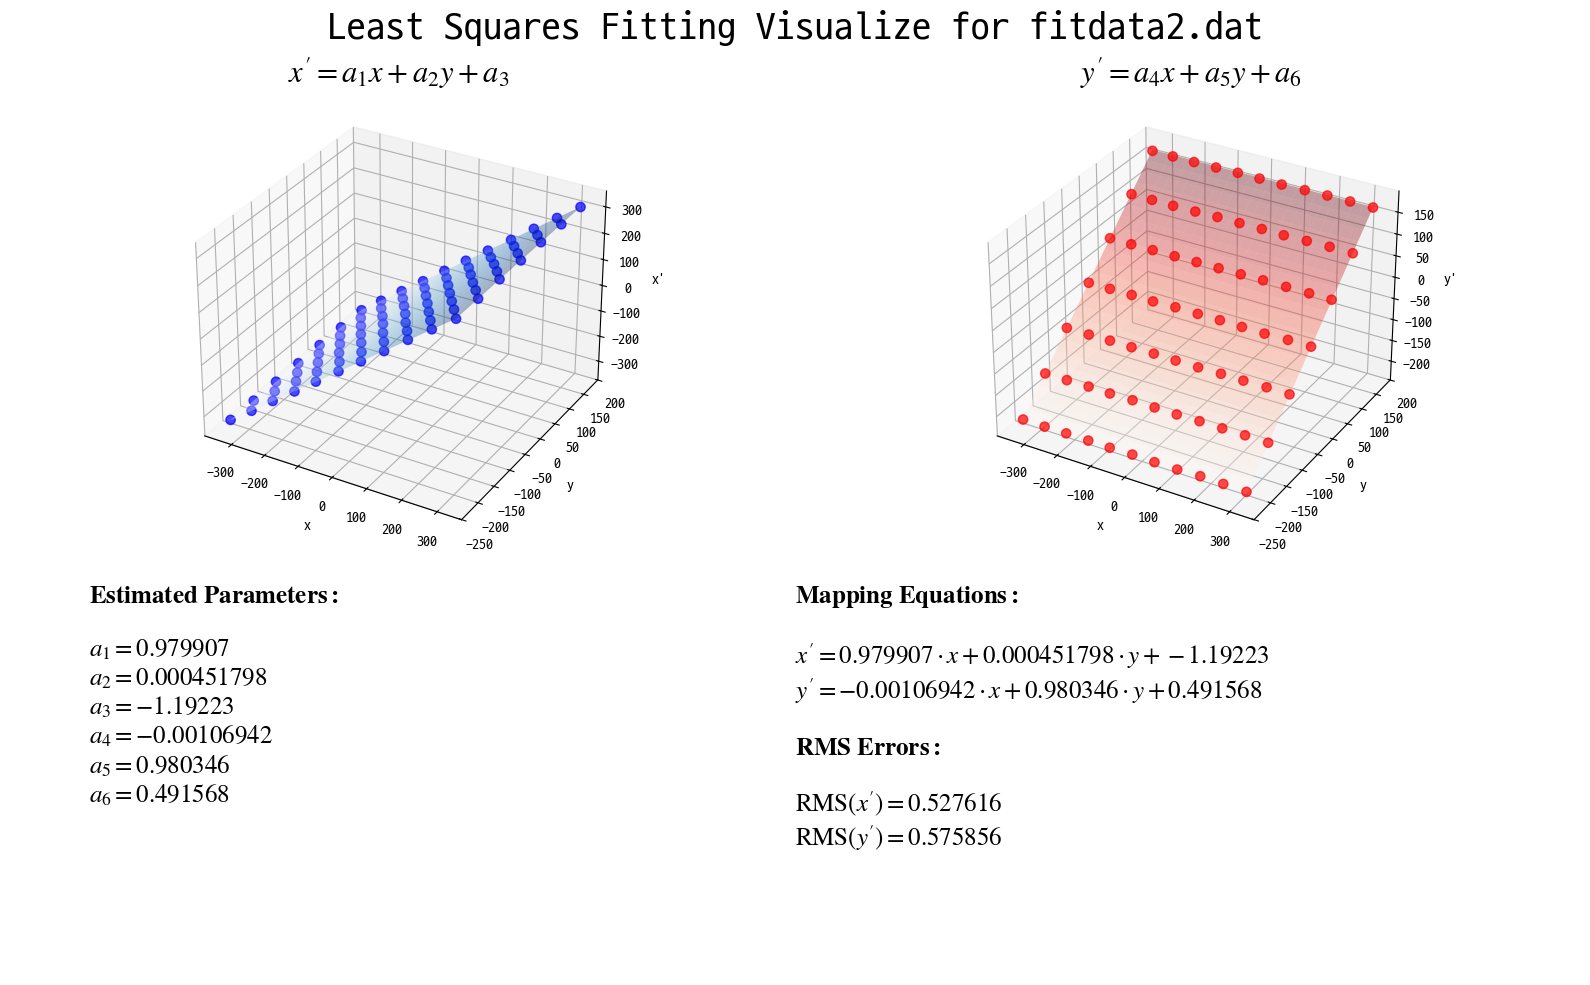

In [68]:
plot_fitdata(fitdata2, params_fitdata2, "fitdata2.dat")
plt.show()

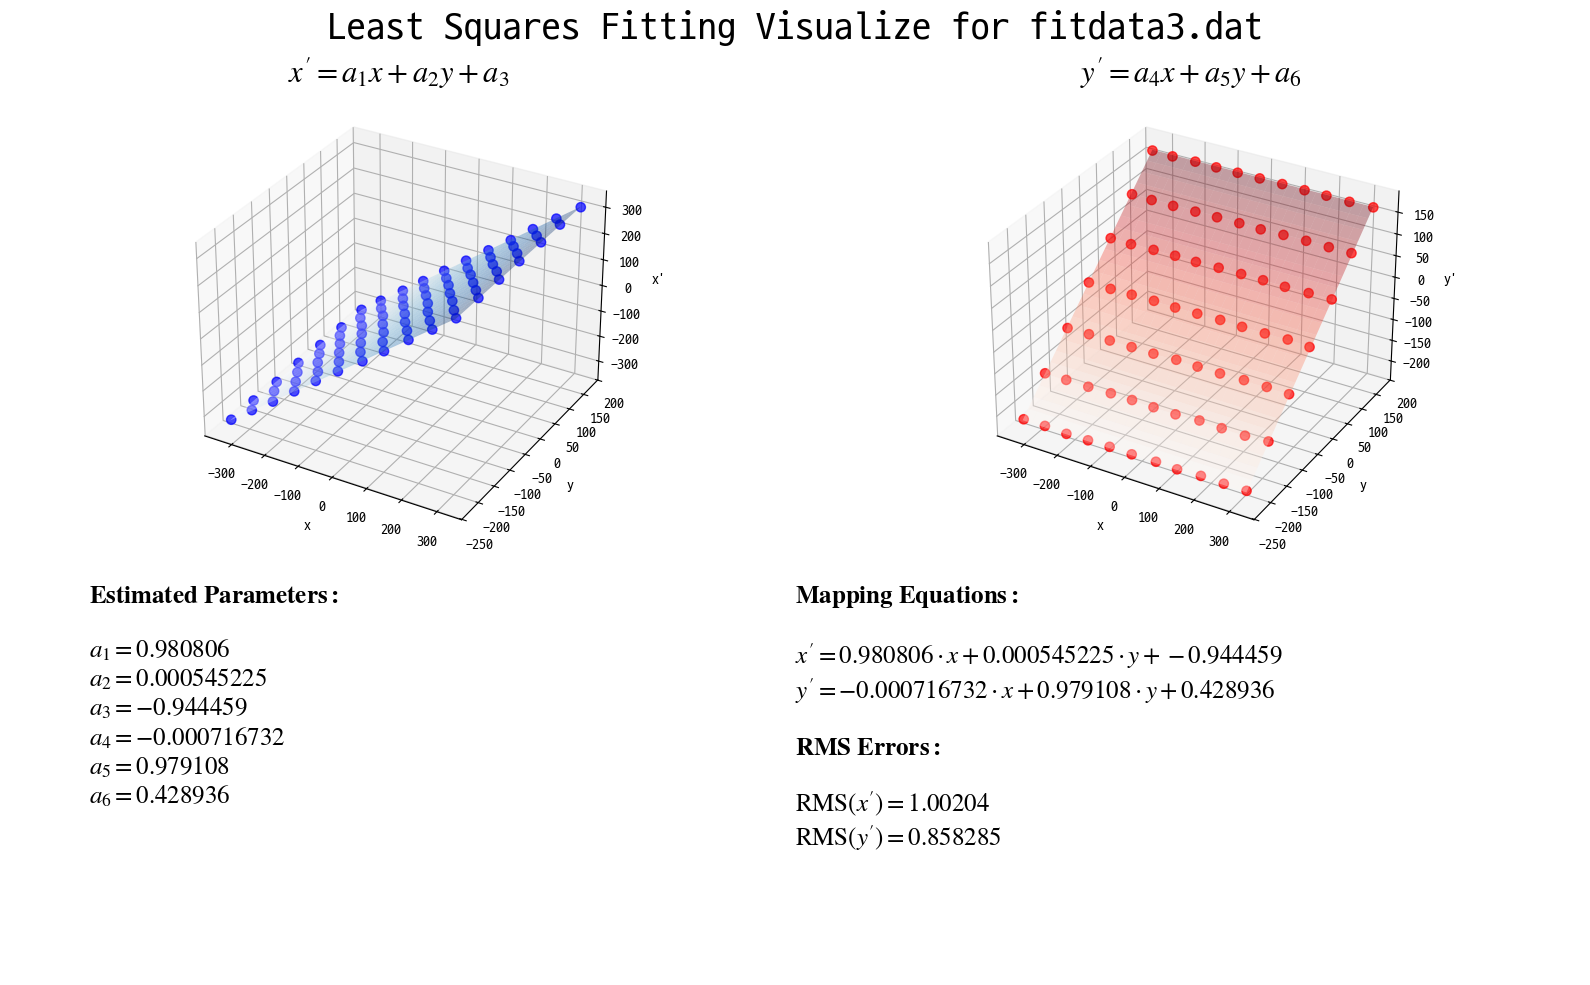

In [69]:
plot_fitdata(fitdata3, params_fitdata3, "fitdata3.dat")
plt.show()